In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

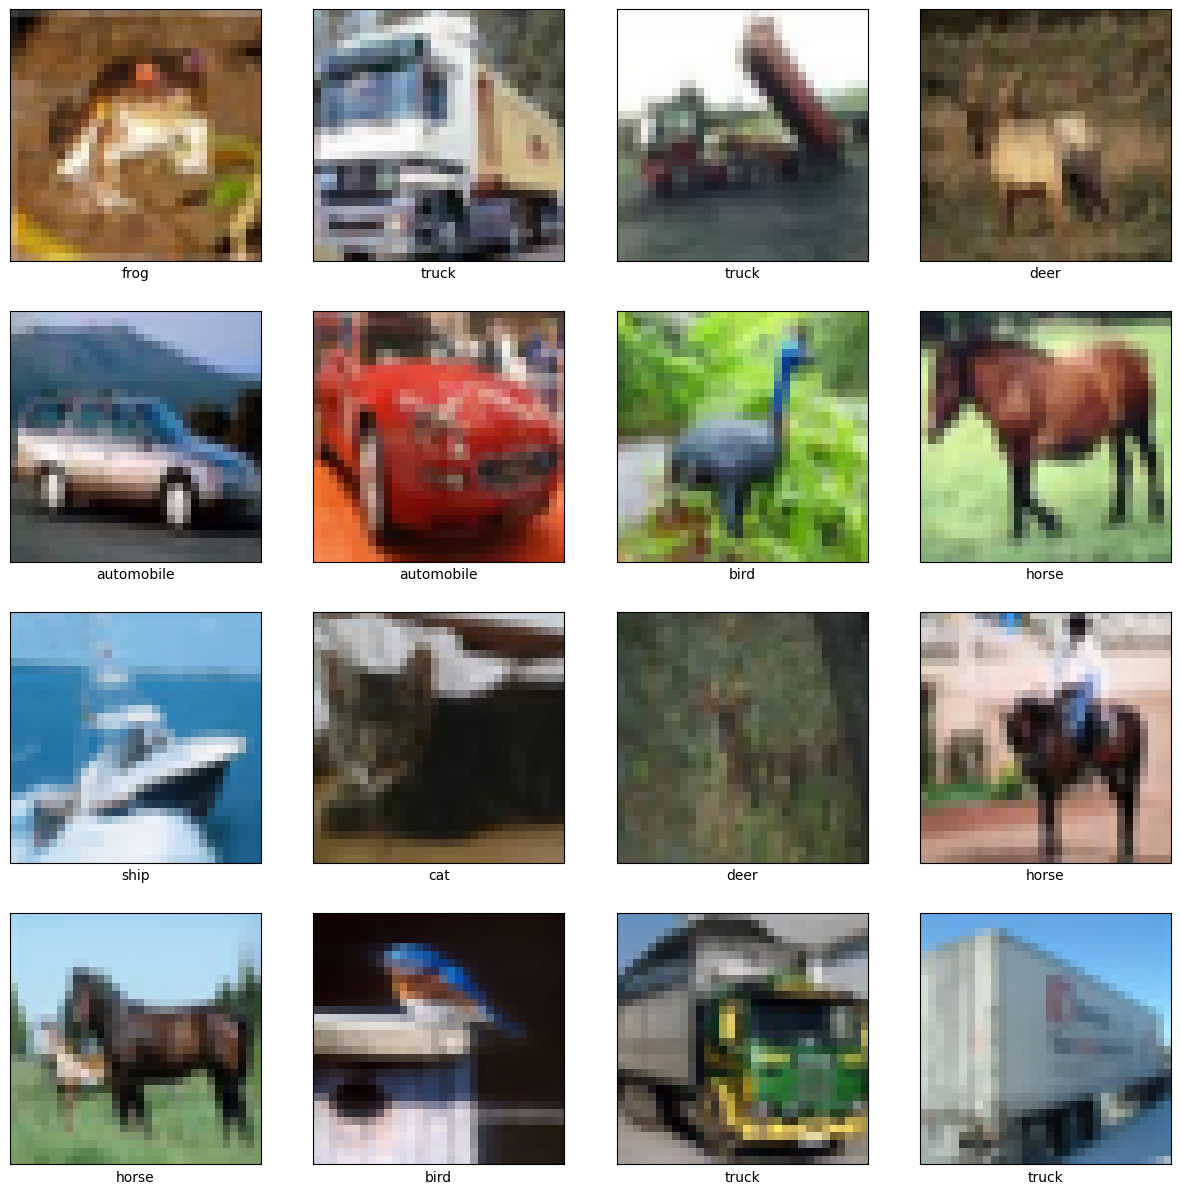

In [3]:
def show_images(train_images, 
                class_names, 
                train_labels, 
                nb_samples = 16, nb_row = 4):
    
    plt.figure(figsize=(15, 15))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [4]:
# Lexicographical order 
from tensorflow.keras.utils import to_categorical

# Data normalization
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [5]:
# One-hot encode the labels
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

In [8]:
# Model architecture implementation
model = Sequential()    #Object for CNN Model
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

C:\Users\sharm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 35

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3984 - loss: 1.6637 - precision: 0.6530 - recall: 0.1571 - val_accuracy: 0.5673 - val_loss: 1.1968 - val_precision: 0.7142 - val_recall: 0.4270
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6213 - loss: 1.0817 - precision: 0.7618 - recall: 0.4672 - val_accuracy: 0.6393 - val_loss: 1.0330 - val_precision: 0.7673 - val_recall: 0.5103
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6772 - loss: 0.9140 - precision: 0.7923 - recall: 0.5642 - val_accuracy: 0.6731 - val_loss: 0.9309 - val_precision: 0.7722 - val_recall: 0.5770
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7148 - loss: 0.8198 - precision: 0.8156 - recall: 0.6156 - val_accuracy: 0.6850 - val_loss: 0.9109 - val_precision: 0.7787 - val_recall: 0.5926
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7466 - loss: 0.7260 - precision: 0.8307 - recall: 0.6658 - val_accuracy: 0

Epoch 34/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9792 - loss: 0.0627 - precision: 0.9803 - recall: 0.9781 - val_accuracy: 0.6804 - val_loss: 2.8985 - val_precision: 0.6859 - val_recall: 0.6775
Epoch 35/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9791 - loss: 0.0632 - precision: 0.9804 - recall: 0.9781 - val_accuracy: 0.6920 - val_loss: 2.9186 - val_precision: 0.6971 - val_recall: 0.6888


In [11]:
epochs = range(1, EPOCHS + 1)
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
precision = training_history.history['precision']
val_precision = training_history.history['val_precision']
recall = training_history.history['recall']
val_recall = training_history.history['val_recall']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Create a list to hold metrics at 5-epoch intervals
metrics_list = []

for epoch in range(4, EPOCHS, 5):  # Collect at 5-epoch intervals
    metrics = {
        'Epoch': epoch + 1,
        'Loss': loss[epoch],
        'Val_Loss': val_loss[epoch],
        'Accuracy': accuracy[epoch],
        'Val_Accuracy': val_accuracy[epoch],
        'Precision': precision[epoch],
        'Val_Precision': val_precision[epoch],
        'Recall': recall[epoch],
        'Val_Recall': val_recall[epoch]
    }
    metrics_list.append(metrics)

# Create a DataFrame from the metrics
df_metrics = pd.DataFrame(metrics_list)
print("\nTraining Metrics Every 5 Epochs:")
df_metrics


Training Metrics Every 5 Epochs:


,Epoch,Loss,Val_Loss,Accuracy,Val_Accuracy,Precision,Val_Precision,Recall,Val_Recall
0,5,0.733577,0.849971,0.74428,0.7112,0.827872,0.796081,0.66344,0.6297
1,10,0.440044,1.007163,0.84606,0.7019,0.886171,0.748006,0.80872,0.6658
2,15,0.237991,1.391279,0.91624,0.6875,0.932406,0.710240,0.90186,0.6721
3,20,0.137066,1.792048,0.95212,0.6963,0.958566,0.709787,0.94668,0.6875
4,25,0.103849,2.234175,0.96322,0.6865,0.966734,0.696003,0.96016,0.6809
5,30,0.089425,2.543113,0.96874,0.6861,0.970939,0.692105,0.96690,0.6820
6,35,0.071279,2.918589,0.97594,0.6920,0.977431,0.697095,0.97446,0.6888


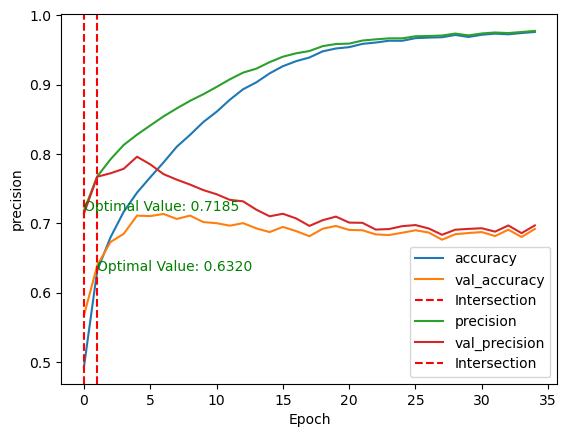

In [12]:
import matplotlib.pyplot as plt
    
def show_performance_curve(training_result, metric, metric_label):
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf, 
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')
                 
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')



show_performance_curve(training_history, 'accuracy', 'accuracy')
show_performance_curve(training_history, 'precision', 'precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


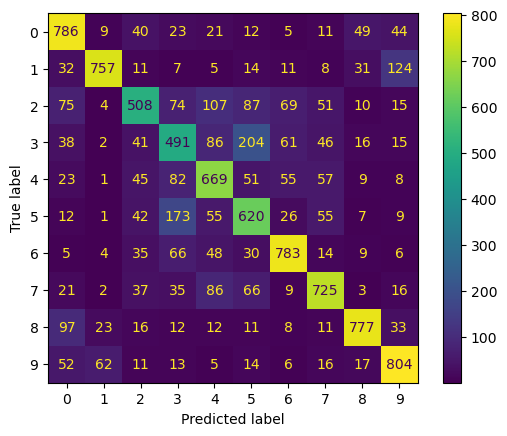

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()